<center> 

# Hypothesis Testing

## Dr. Lange- University of Chicago
## Data 11800 - Winter 2024 

<img src="https://raw.githubusercontent.com/amandakube/Data118LectureImages/main/UChicago_DSI.png" alt="UC-DSI" width="500" height="600">
    
</center>

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

# Review

### Basic Probability Rules

- $\text{P}(E^C) = 1 - \text{P}(E)$$ for any event $E$

- $\text{P}(A \cup B) = \text{P}(A) +
\text{P}(B) - \text{P}(A \cap B)$


- Given two **independent** events, 
$\text{P}(A \cap B) = \text{P}(A)\text{P}(B)$

- **Multiplication rule in general**: $\text{P}(A \text{ and } B) = \text{P}(A|B) \text{P}(B)$. Note that this follows directly from the definition of conditional probability

- $P(A|B)= \frac{P(A \cap B)}{P(B)} $


For a **discrete uniform distribution** and an event A:
$$P(A) = \frac{\text{elements in A}}{\text{total number of outcomes}}$$

For a **binomial distribution**: with $n$ trials, prob of success $p$, we are interested in the probability of exactly $j$ successes, where $1 \leq j \leq n$. 

Let $X$ record the number of successes, then 

$$P(X=j) = b(n,p,j) = {n \choose j} p^j (1-p)^{n-j}.$$


Normal Distribution
    - defined by mean and variance
    - symmetric
    
Central Limit Theorem

### One more important note about the normal distribution

Binomial Approximation

The normal distribution can be used as an **approximation** to the binomial distribution, under certain circumstances, 

  - namely: If $X \sim B(n, p)$ 
 
  - and if n is large 
  
  - and/or p is close to 0.5, 
   
then X is approximately normal with $\mu = np$ and $\sigma =npq$

## Big picture goal: 

Inference: using data from a sample to draw conclusions about a 
wider population. 

<center>

<img src="https://raw.githubusercontent.com/SusannaLange/Data_118_images/main/images/Probability/stat_inference.png" width="700">
    
</center>

A **statistic** is a measure that describes the sample (e.g., sample mean).


A **parameter** is a measure that describes the whole population (e.g., population mean).

## Two Main Goals of Statistical Inference

1. Testing hypotheses to draw conclusions about populations (for example, does sample data sufficiently support a particular hypothesis).

2. Making estimates about populations (for example, the mean SAT score of all 11th graders in the US).

**Hypothesis testing** is a formal procedure for investigating our ideas about the world using statistics. It is used by scientists to test specific predictions, called hypotheses, by calculating how likely it is that a pattern or relationship between variables could have arisen by chance.

**Informal example** 

Suppose that a friend is telling you that he has a fair 6 sided die and he rolls the die 20 times. 


The following describes this model:

- there is a die with 6 sides
- a total of 20 rolls are rolled
- for one roll each face has an equal chance of being selected


Suppose your friend reports the results of a rolls (these are the data) and here are two hypothetical scenarios (datasets):

- Scenario 1: outcome is

$$\text{2 outcomes: } ⚀ $$


$$\text{4 outcomes: } ⚂ $$



<center>
    $\text{6 outcomes:}$ <img src = "https://raw.githubusercontent.com/SusannaLange/Data_118_images/main/images/Probability/8_die.png" width="15" style="display: inline-block; margin: 0" />
</center>


$$\text{8 outcomes: } ⚅$$

Is this outcome consistent with the model above?


- Scenario 2: outcome is 


$$\text{5 outcomes: } ⚀ $$


$$\text{3 outcomes: } ⚁ $$

$$\text{2 outcomes: } ⚂ $$

$$\text{4 outcomes: } ⚃ $$

$$\text{5 outcomes: } ⚄ $$


$$\text{1 outcomes: } ⚅$$

Is this outcome consistent with the model above? 


**Hypothesis Testing formalizes this idea**

Provides a way to investigate the consistency of a dataset with a (data-generating) model.

Consider this distribution:

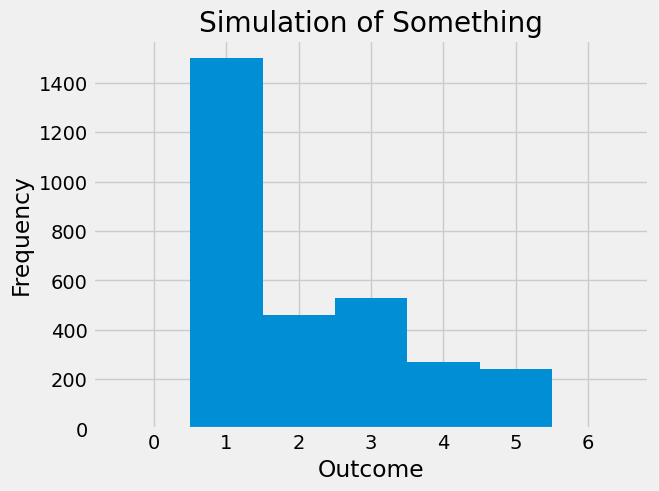

In [2]:
#ignore the code here.....
die = pd.DataFrame(
    {
        'Face': np.arange(1, 7),
    }
)
def face_mean_simoutput(nsim):
    """Simulates nsim repetions of 50 dice rolls and returns their sample mean."""
    outputs = np.array([])
    
    for i in np.arange(nsim):
         outputs = np.append(outputs, (die.sample(50, replace=True, weights= [6/12,2/12,2/12,1/12,1/12,0])))
    return outputs

outputs= face_mean_simoutput(60)
plt.hist(outputs, bins = np.arange(0,8)-0.5);

plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.title('Simulation of Something')
plt.show()

Perhaps we want to know if this distribution comes from rolling a 6 sided die and recording the output?

It is easier to evaluate a numerical characteristic of the data, such as the mean, instead of looking at the full dataset. Below we calculate the mean of the values in our data.

In [ ]:
dataset_mean = np.mean(outputs)
dataset_mean

Is this mean consistent with our model?

We generate 1000 datasets from our model for which we obtain their means and compare.

In [ ]:
def face_mean_sim(nsim):
    """Simulates nsim repetions of 50 dice rolls and returns their sample mean."""
    means = np.array([])
    
    for i in np.arange(nsim):
        means = np.append(means, np.mean(die.sample(50, replace=True)))
    return means

In [ ]:
means_dist = face_mean_sim(1000)
plt.hist(means_dist); #pick 50 die rolls take the mean...pick another 50 die rolls take the mean ...etc
plt.xlabel('Mean')
plt.ylabel('Frequency')
plt.title('Mean Dice Roll Simulation')
plt.scatter(np.mean(outputs), -2, color='red', s=30);
plt.show()

One indicator of consistency is how likely we are to obtain the observed mean or something more extreme from our model.

How many means from our model have a red dot less than the red dot above?

In [ ]:
sum(means_dist<=np.mean(outputs))

Therefore 0/1000 = 0 % of the distributions have a mean more extreme!!!

 Choosing between two views, called hypotheses, on how data were generated

 - The test selects the hypothesis that is better supported by the data.
 
**Hypotheses should be specified before doing the analysis.**

 - Ingredients:
 
 - A null hypothesis $H_0$ - in our case mean = 3.5
 
 - An alternative hypothesis $H_A$ - mean $\neq 3.5$
 
 - A test statistic (in many situations associated to a model);
 
 - A decision or a measure of significance (P-value)
 
 - The decision is made using the null distribution of the test statistics (probability distribution); we will use an approximation given by an empirical distribution. (P-value is about the tail area of the distribution.)

#### We can explore this for real world data too!

Is having a boy 50% ?

It turns out that for many countries, the probability of having a boy is 0.512 which corresponds to a 105 boys being born for every 100 girls, leading to a ratio of 1.05 which is known as the secondary sex ratio (SSR). You can read more information on [sex ratio here](https://en.wikipedia.org/wiki/Sex_ratio).

https://www.prb.org/usrecessionandbirthrate/


## Sex differences at birth and in the general population ##


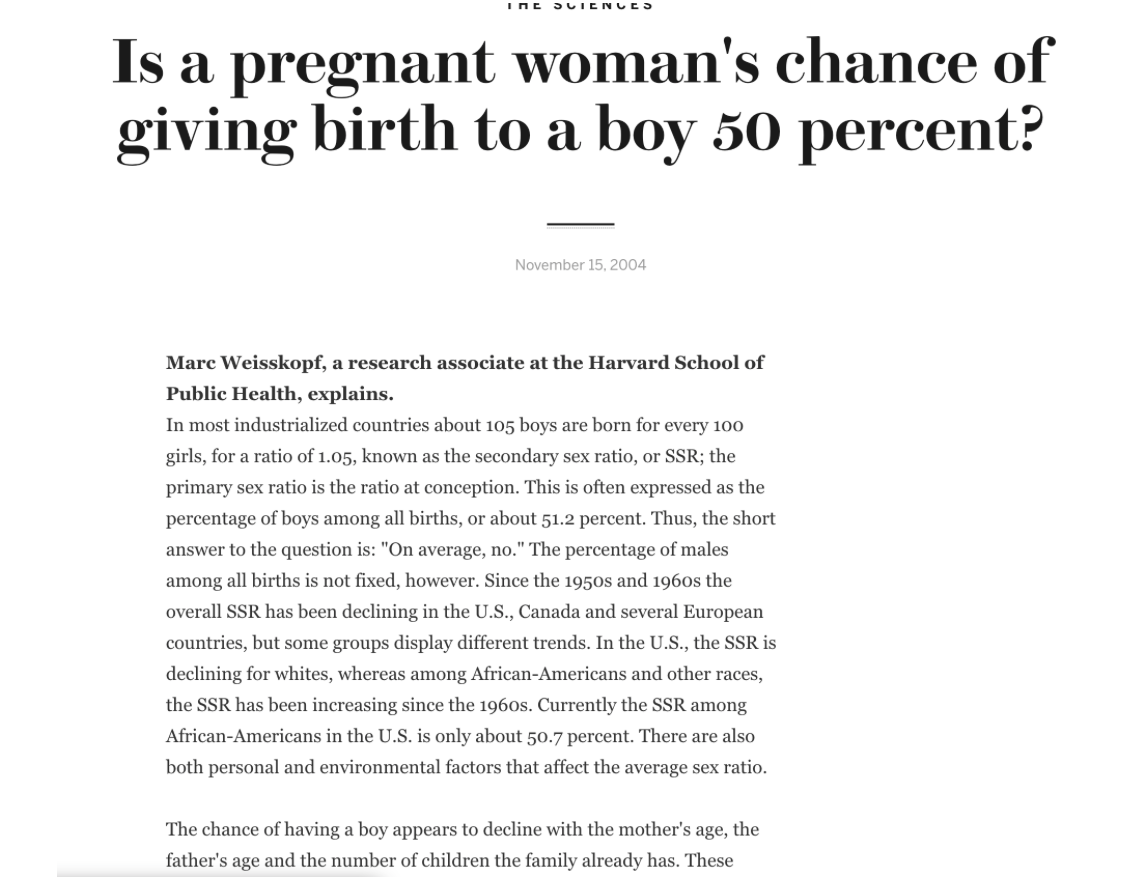




#### What are we interested in??

Someone claims that **white mothers over 40 years old in Illinois** have a different SSR based on what they have seen in a hospital. 



**Before looking at the data, you need to decide on the first three ingredients:**

 - **Null hypothesis** 

 - **Alternative hypothesis**

 - **Test statistic** 

##### How do we choose these values?

**Null hypothesis** is generally the default view (generally believed to be true)

In this case, it makes sense to declare that $H_0:$ SSR_IL=1.05 (the secondary sex ratio in white mothers over 40 in Illinois is 1.05). 

**Alternative hypothesis** should be the opposite of the null, but it can have variations 

 - (for example, I can use SSR_IL<1.05 or SSR_IL>1.05). 
 
It is natural to use $H_A:$ SSR_IL$\neq$ 1.05. Note that the choice of alternative will impact the measure of significance that is discussed below.


**Test statistic** is the summary of the data that will be used for investigating consistency. We aim to choose the statistic that is most informative for the hypotheses we are investigating. 

We will use here the observed SSR in our subset of IL as a test statistic.

#### To investigate the secondary sex ratio, we downloaded the breakdown of 2016 births from CDC:

https://wonder.cdc.gov/natality.html

In [ ]:
#data from 
natality2016=pd.read_csv("https://raw.githubusercontent.com/SusannaLange/Data_118_images/main/Data/Natality2016.csv")
natality2016.head(8)

In [ ]:
natality2016[['Gender.Code','Births']].groupby('Gender.Code').sum()


In [ ]:
# SSR
2016003/1925598


In [ ]:
pd.pivot_table(natality2016,index=['Single.Race'],columns=['Gender.Code'],\
               values=['Births'],aggfunc=sum)

In [ ]:
natality2016[(natality2016['State']=='Illinois') & (natality2016['Single.Race']=='White')]

In [ ]:
# SSR for White mothers over 40 years old
(1811+121)/(1823+107+11)

In [ ]:
#number of births in that group
(1811+121+1823+107+11)

## Do we have evidence that SSR in this selected group is different? ##

We would like to investigate if these data are realistic when SSR=1.05. This is called model assessment:
- the model is: births are sampled independently from a population with SSR=1.05
- assessment: done with simulations here, but also can be done with probabilistic models.



- The number of boys in 3873 births is a random variable.
- The sample SSR is also a random variable.
- We are interested in their **probability distributions (sampling distributions).**

### Review ###

We will use simulations to do statistical inference. As a consequence it is useful to review functions we can use to simulate random samples:
1.  A function defined by us using `np.random.choice()`;
2. `np.random.binomial()`;
3. The `sample` command in `Pandas`

The questions we will answer: 

-  what are the assumptions underlying them?
-  how are they different?

In [ ]:
natality2016[['Gender.Code','Births']].groupby('Gender.Code').sum()

In [ ]:
print("Sample proportion of Boys:",2016003/(2016003+1925598))
print("Sample proportion of Girls:",1925598/(2016003+1925598))

In [ ]:
# Simulate number of boys in 3873 births
sum(np.random.choice(["b","g"],size=3873,p=[0.512,0.488])=="b")


In [ ]:
# I can also use np.random.binomial for the same simulation
np.random.binomial(3873,0.512,1)


We now investigate the range of sample SSRs we obtain in 
 samples of 3873 births from a population with SSR=1.05

In [ ]:
sim=np.random.binomial(3873,0.512,1000)

### Let's plot this

In [ ]:
# we now investigate the range of sample SSRs we obtain in 
# samples of 3873 births from a population with SSR=1.05

plt.hist(sim/(3873-sim))
plt.title("1000 simulations of 3873 births")
plt.ylabel('Frequency')
plt.xlabel('SSR')
plt.show()

#plt.savefig("ILsrs.png")

# note that savefig() will save the image to the notebook folder
# this can be useful for the project

### What about our test statistic?

In [ ]:
plt.hist(sim/(3873-sim))
plt.scatter(0.9953, -5, color='red', s=30)
plt.title("1000 simulations of 3873 births")
plt.ylabel('Frequency')
plt.xlabel('SSR')
plt.show()

How likely is the red dot to come from this distribution??

In [ ]:
sum(sim/(3873-sim)<0.9953)

In [ ]:
(sum(sim/(3873-sim)<0.9953))/1000

##### This idea  helps us make a decision or a measure of significance (P-value) in order to make a conclusion

The **p-value** is the chance:

 - under the null hypothesis that the test statistic is equal to the observed value or is further in the direction of the alternative.


#### What is the p-value for our example?

How many ratios were more extreme than this value we found. We didn't specify in which direction extreme was...so we actually need to consider both sides!!

In [ ]:
p_value= 2*(sum(sim/(3873-sim)<0.9953))/1000
p_value

In [ ]:
print('Corresponds to a p-value of ', str(p_value))

### Investigating the SSR in Illinois mothers

The observed/sample SSR (denoted by $obsSSR$) in a group of selected 3873 births was 0.9953 (1932 boys and 1941 girls).

To test
-  $H_0: SSR=1.05$
-  $H_A: SSR\neq 1.05$

We can use one of the following test statistics:
1. $T_1= obsSSR$
2. $T_2=|obsSSR-1.05|$

**For what values of the test statistics should I have doubts about $H_0$?**

1. when $T_1$ is too small or too large
2. when $T_2$ is too large

**How small is “small”? According to the conventions:**

 - p < 0.05

It is considered small and the result is called “statistically significant.”


If the p-value is even smaller – 
 - less than 1% – (p < 0.01) the result is called “highly statistically significant.”

Our p-value was **not** < 0.05. So the conventional conclusion would be 

**We fail to reject the null hypothesis. At the 5% significance level, with p =0.098, there is not enough evidence to reject that this test statistic came from the null distribution.**

## Decisions and Statistical Significance

In some studies, a decision needs to be made about which hypothesis to trust:
* Select a cut-off value α, called significance level
  * If P-value ≤α, we reject H0
  * If P-value > α, we do not reject H0

Commonly used significance levels: 0.05 and 0.01
* A test with P-value < 0.05 is called statistically significant
* A test with P-value < 0.01 is called highly significant

Sir Ronald Fisher popularized the use of p-values and proposed the level p = 0.05, or a 1 in 20 chance of being exceeded by chance, as a limit for statistical significance (in his 1925 book, Statistical Methods for Research
Workers).

Albert Einstein: "No amount of experimentation can ever prove me right; a single experiment can prove me wrong".

With data, we cannot really prove a hypothesis, but we can disprove it.

Therefore we never declare the null hypothesis to be true.

Correct statement: "We do not have evidence to reject the null hypothesis".

##### Important Note: 

It is recommended that you don’t just say whether or not the result is statistically significant.

 - Along with your conclusion, provide the observed statistic and the p-value as well, so that readers can use their own judgment.

## Wait...why did we consider both tail ends up above?

|                                | One-tailed test                                                                                              | Two-tailed test                                                                              |   |   |
|--------------------------------|--------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------|---|---|
| **Meaning**                        | Alternative hypothesis has only one end, is known as one tailed test. | Alternative hypothesis has two ends, is called two-tailed test. |   |   |
| **Hypothesis**                    | Directional                                                                                                  | Non directional                                                                              |   |   |
| **Sign in alternative hypothesis**| > or <                                                                                                       | $\neq$                                                                                       |   |   |

**Left-tailed test:** When the population parameter is believed to be lower than the assumed one, the hypothesis test carried out is the left-tailed test.

**Right-tailed test:** When the population parameter is supposed to be greater than the assumed one, the statistical test conducted is a right-tailed test.

### Hypothesis Test (another example start to finish)

Is there evidence for data not fitting the standard SSR = 1.05 model from a different subset of the data?

Is there evidence that **'black or african american' mothers** have a different SSR??

<code style="background:Thistle;color:black">  Identify H_0 the null hypothesis: </code>

<code style="background:Thistle;color:black">  Identify H_A the alternate hypothesis: </code>

<code style="background:Thistle;color:black">  One sided or two sided test? </code>

<code style="background:Thistle;color:black">  What is the next step?</code>

In [ ]:
#this might help
pd.pivot_table(natality2016,index=['Single.Race'],columns=['Gender.Code'],\
               values=['Births'],aggfunc=sum)

In [ ]:
# SSR for the "Black or African American" subset
315828/307433

<code style="background:Thistle;color:black"> Observed SSR =  </code>

In [ ]:
Now we need to simulate the null distribution...

In [ ]:
sim2 = np.random.binomial()

In [ ]:
plt.hist(sim2/(????-sim2))
plt.scatter(1.0273, -5, color='red', s=30)
plt.title("10000 simulations of 623261 births");
plt.ylabel('Frequency')
plt.xlabel('SSR')
plt.show()

In [ ]:
## p-value 
2*((sum(sim2/(623261-sim2)<1.0273))/10000)

The test statistic is simulated based on the assumptions of the model in the null hypothesis. 

By simulating the statistic repeatedly, we get a good sense of its possible values and which ones are more likely than others. In other words, we get a good approximation to the probability distribution of the statistic, as predicted by the model in the null hypothesis.

<code style="background:Thistle;color:black"> Conclusion:  </code>